# PTT爬蟲內容 進行 關鍵字分析
    # Web Crawler + Word Cloud + 統計出現頻率 + 同時出現單詞

## 1.爬取資料

In [1]:
from datetime import datetime
import requests
from bs4 import BeautifulSoup

class Crawler:
    ptt_url = 'https://www.ptt.cc'
    
    def __init__(self, board):
        self.board = board
        self.board_url = "/bbs/{}".format(board)
        self.articles = []
        self.contents = []
    
    def GetToday(self, date=None, page_next=None, keyword=None, num_posts=100):
        # 沒有下一頁，回到該版首頁
        if page_next == None:
            page_next = self.board_url
        # 沒有指定日期就用 2020/2/12
        if date == None:
            date = datetime(2020, 2, 12)
        
        # 頁面解析
        r = requests.get(Crawler.ptt_url + page_next, cookies={'over18': '1'})
        if r.status_code == 404:
            print('Error board!!!')
            return
        self.page_text = r.text
            # 找列表分隔線之上
        page_text = self.page_text.split('r-list-sep')[0]
        soup = BeautifulSoup(page_text, 'lxml')
        
        # 下一頁網址
        page_next = soup.find('div', 'btn-group btn-group-paging').find_all('a')[1].attrs['href']
        
        # 找到每一篇文章
        for p in soup.select('div.r-ent'):
            # 每篇文章網址
            url = p.find('div', 'title').a
            if url == None:
                continue
            else:
                url = p.find('div', 'title').a.attrs['href']
            print('本文網址 =', Crawler.ptt_url + url)
            
            # 找出 標題 + 內容
            article_txt = requests.get(Crawler.ptt_url + url, cookies={'over18': '1'}).text
            article_soup = BeautifulSoup(article_txt, 'lxml')
                # 文章標題
            title = article_soup.find('title').text
                # 文章內容
            content = article_soup.find('meta', property='og:description').get('content')
            if title == None or content == None:
                continue
            
            # 有關鍵字 但本篇文章找不到 跳過
            if keyword != None:
                if title.find(keyword) < 0 and content.find(keyword) < 0:
                    continue
            
            # 建立分析文本：[標題1:內文1, ...]
            self.contents.append(title + ':' + content)
            
            # 分析文本 加上 推文
            push_list = []
            for push in article_soup.find_all('span', class_='push-content'):
                if len(push.text[2:]) <= 0:     # 推文內容從 ': ' 之後開始
                    continue
                push_list.append(push.text[2:])
            self.contents.append(push_list)
            
            # 文章限定2020的某一天
            time_str = p.find('div', 'date').text.strip()
            time_full = datetime.strptime(time_str+'/2020', '%m/%d/%Y')   # 轉成datetime
            if time_full < date:
                return
        
        # for else：迴圈沒有break(loop正常退出) 就會執行到 else
        else:
            # 設定 文章篇數(含推文，一推文算一篇) 最大值
            if len(self.contents) > num_posts:
                return
            # 換頁繼續遞迴
            print('PTT換頁繼續：', Crawler.ptt_url + page_next)
            self.GetToday(date, page_next, keyword, num_posts)

In [41]:
# 八卦版
board = 'gossiping'
crawler = Crawler(board)
# 找尋特定關鍵字
# date用預設2020/2/12，表示該日期之後的文章
crawler.GetToday(num_posts=50, keyword='武漢')
print('文本數 =', len(crawler.contents))

本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541636.A.5C5.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541659.A.FED.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541695.A.6D8.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541727.A.ACC.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541785.A.C40.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541788.A.B0A.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541866.A.49D.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541903.A.BB5.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541912.A.B21.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541914.A.222.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541954.A.204.html
PTT換頁繼續： https://www.ptt.cc/bbs/Gossiping/index39030.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582540952.A.846.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582540976.A.221.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582541088.A.A21.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582

本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582539334.A.E58.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582539352.A.051.html
PTT換頁繼續： https://www.ptt.cc/bbs/Gossiping/index39024.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538446.A.BD2.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538458.A.A9F.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538492.A.27D.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538499.A.DFA.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538508.A.E34.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538551.A.E60.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538569.A.7E0.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538580.A.5B2.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538582.A.5C3.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538720.A.B45.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538748.A.517.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582538773.A.920.html
本文網址 = https://www.ptt.cc/bbs/Gossiping/M.1582

## [2.關鍵字分析-ckiptagger](https://github.com/ckiplab/ckiptagger)
    # 安裝
        # 中研院ckiptagger套件
            # pip install -U ckiptagger
        # gdown套件(從 google drive 上載下模型)
            # conda install -c conda-forge gdown
    # import
        # from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
    # 下載模型(會生成data資料夾放置裡面)
        # data_utils.download_data_gdown("./")

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
# # 將訓練好的模型參數下載到本機
# data_utils.download_data_gdown("./")
# import os
# import sys
# 使用模型進行分析：載入模型
    # 有GPU
        # 安裝 tensorflow-gpu設定環境變數 
        # os.environ['CUDA_VISIBLE_DEVICES'] = '0'
        # WS、POS、NER加參數 disable_cuda=False

ws = WS('./data')       # 斷詞(word segmentation)
pos = POS('./data')     # 詞性標註(Part-of-speech tagging)
ner = NER('./data')     # 命名實體識別

In [43]:
# 對文本 進行分析
    # 考量分隔符號(delimiters)
    # [[第一筆斷詞], [第二筆斷詞], ...]
word_sentence_list = ws(crawler.contents, sentence_segmentation=True, 
                        segment_delimiter_set={",", "。", ":", "?", "!", ";", '.', '(', ')', '()', ' [', '] ', '：'
                                               , '》'})
pos_sentence_list = pos(word_sentence_list)
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

# 分析完畢刪除暫存
del ws
del pos
del ner

In [44]:
# 斷詞(磁性)
def print_word_pos_sentence(word_sentence, pos_sentence):
    # assert(斷言)：斷定該時間點上，某變數必然是某值，或某物件必具擁有何種特性值
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
        print(f'{word}({pos})', end='\u3000')
    print()
    return

for i, s in enumerate(word_sentence_list):
    # 先以第一筆為例，以免印出太多
    if i != 0:
        break
    
    print()
    # 每一筆全部內容
    print(f"'{s}'")
    # 所有 單詞(磁性)
    print_word_pos_sentence(word_sentence_list[i], pos_sentence_list[i])
    # 所有判斷出的實體
    for entity in sorted(entity_sentence_list[i]):
        print(entity)


'['Re', ':', ' [', '新聞', ']', '中央', '公布', '台中', '武漢', '肺炎', '確診', '4', '例', ' ', '盧秀燕', '：', '不', ' - ', '看板', ' Gossiping - ', '批踢踢', '實業坊', ':', '美國', '第一', '位', '猶太裔', '大法官', '\nLouis ', 'Brandeis\n', '曾', '說', '過', '\nSunlight is said to be the best ', 'of disinfectants', ',', ' electric light the most\nefficient policeman', '.', '\n']'
Re(FW)　:(COLONCATEGORY)　 [(FW)　新聞(Na)　](PARENTHESISCATEGORY)　中央(Nc)　公布(VE)　台中(Nc)　武漢(Nc)　肺炎(Na)　確診(Nv)　4(Neu)　例(Na)　 (WHITESPACE)　盧秀燕(Nb)　：(COLONCATEGORY)　不(D)　 - (FW)　看板(Na)　 Gossiping - (FW)　批踢踢(Na)　實業坊(Nc)　:(COLONCATEGORY)　美國(Nc)　第一(Neu)　位(Nf)　猶太裔(Na)　大法官(Na)　
Louis (FW)　Brandeis
(Nb)　曾(D)　說(VE)　過(Di)　
Sunlight is said to be the best (FW)　of disinfectants(FW)　,(COMMACATEGORY)　 electric light the most
efficient policeman(FW)　.(PERIODCATEGORY)　
(WHITESPACE)　
(14, 16, 'GPE', '武漢')
(20, 21, 'CARDINAL', '4')
(23, 26, 'PERSON', '盧秀燕')
(53, 55, 'GPE', '美國')
(55, 57, 'ORDINAL', '第一')
(58, 61, 'NORP', '猶太裔')


In [45]:
# 所有實體 抓名稱
count_list = []
for e in entity_sentence_list:
    for i in e:
        count_list.append(i[3])

# 計算出現最多次數的單詞(可指定前幾個)
from collections import Counter
entity = Counter(count_list)
print('單詞出現次數前五名 =', entity.most_common(5))
# 建立單詞 + 出現次數
df = pd.DataFrame(count_list, columns=['entity'])
text = df.entity.value_counts()
text.head(30)

單詞出現次數前五名 = [('武漢', 41), ('台灣', 31), ('中國', 27), ('柯文哲', 12), ('北韓', 9)]


武漢      41
台灣      31
中國      27
柯文哲     12
北韓       9
中國人      7
盧秀燕      6
韓國       6
4        5
國衛院      4
台灣人      4
台中       3
日本       3
宜蘭       3
蔣介石      3
1        3
桃園       2
武漢人      2
台北       2
南韓       2
今年       2
臺灣       2
歐洲       2
東西       2
幸福城市     2
基隆河      2
北部       2
今天       2
4/27     2
河堤       2
Name: entity, dtype: int64

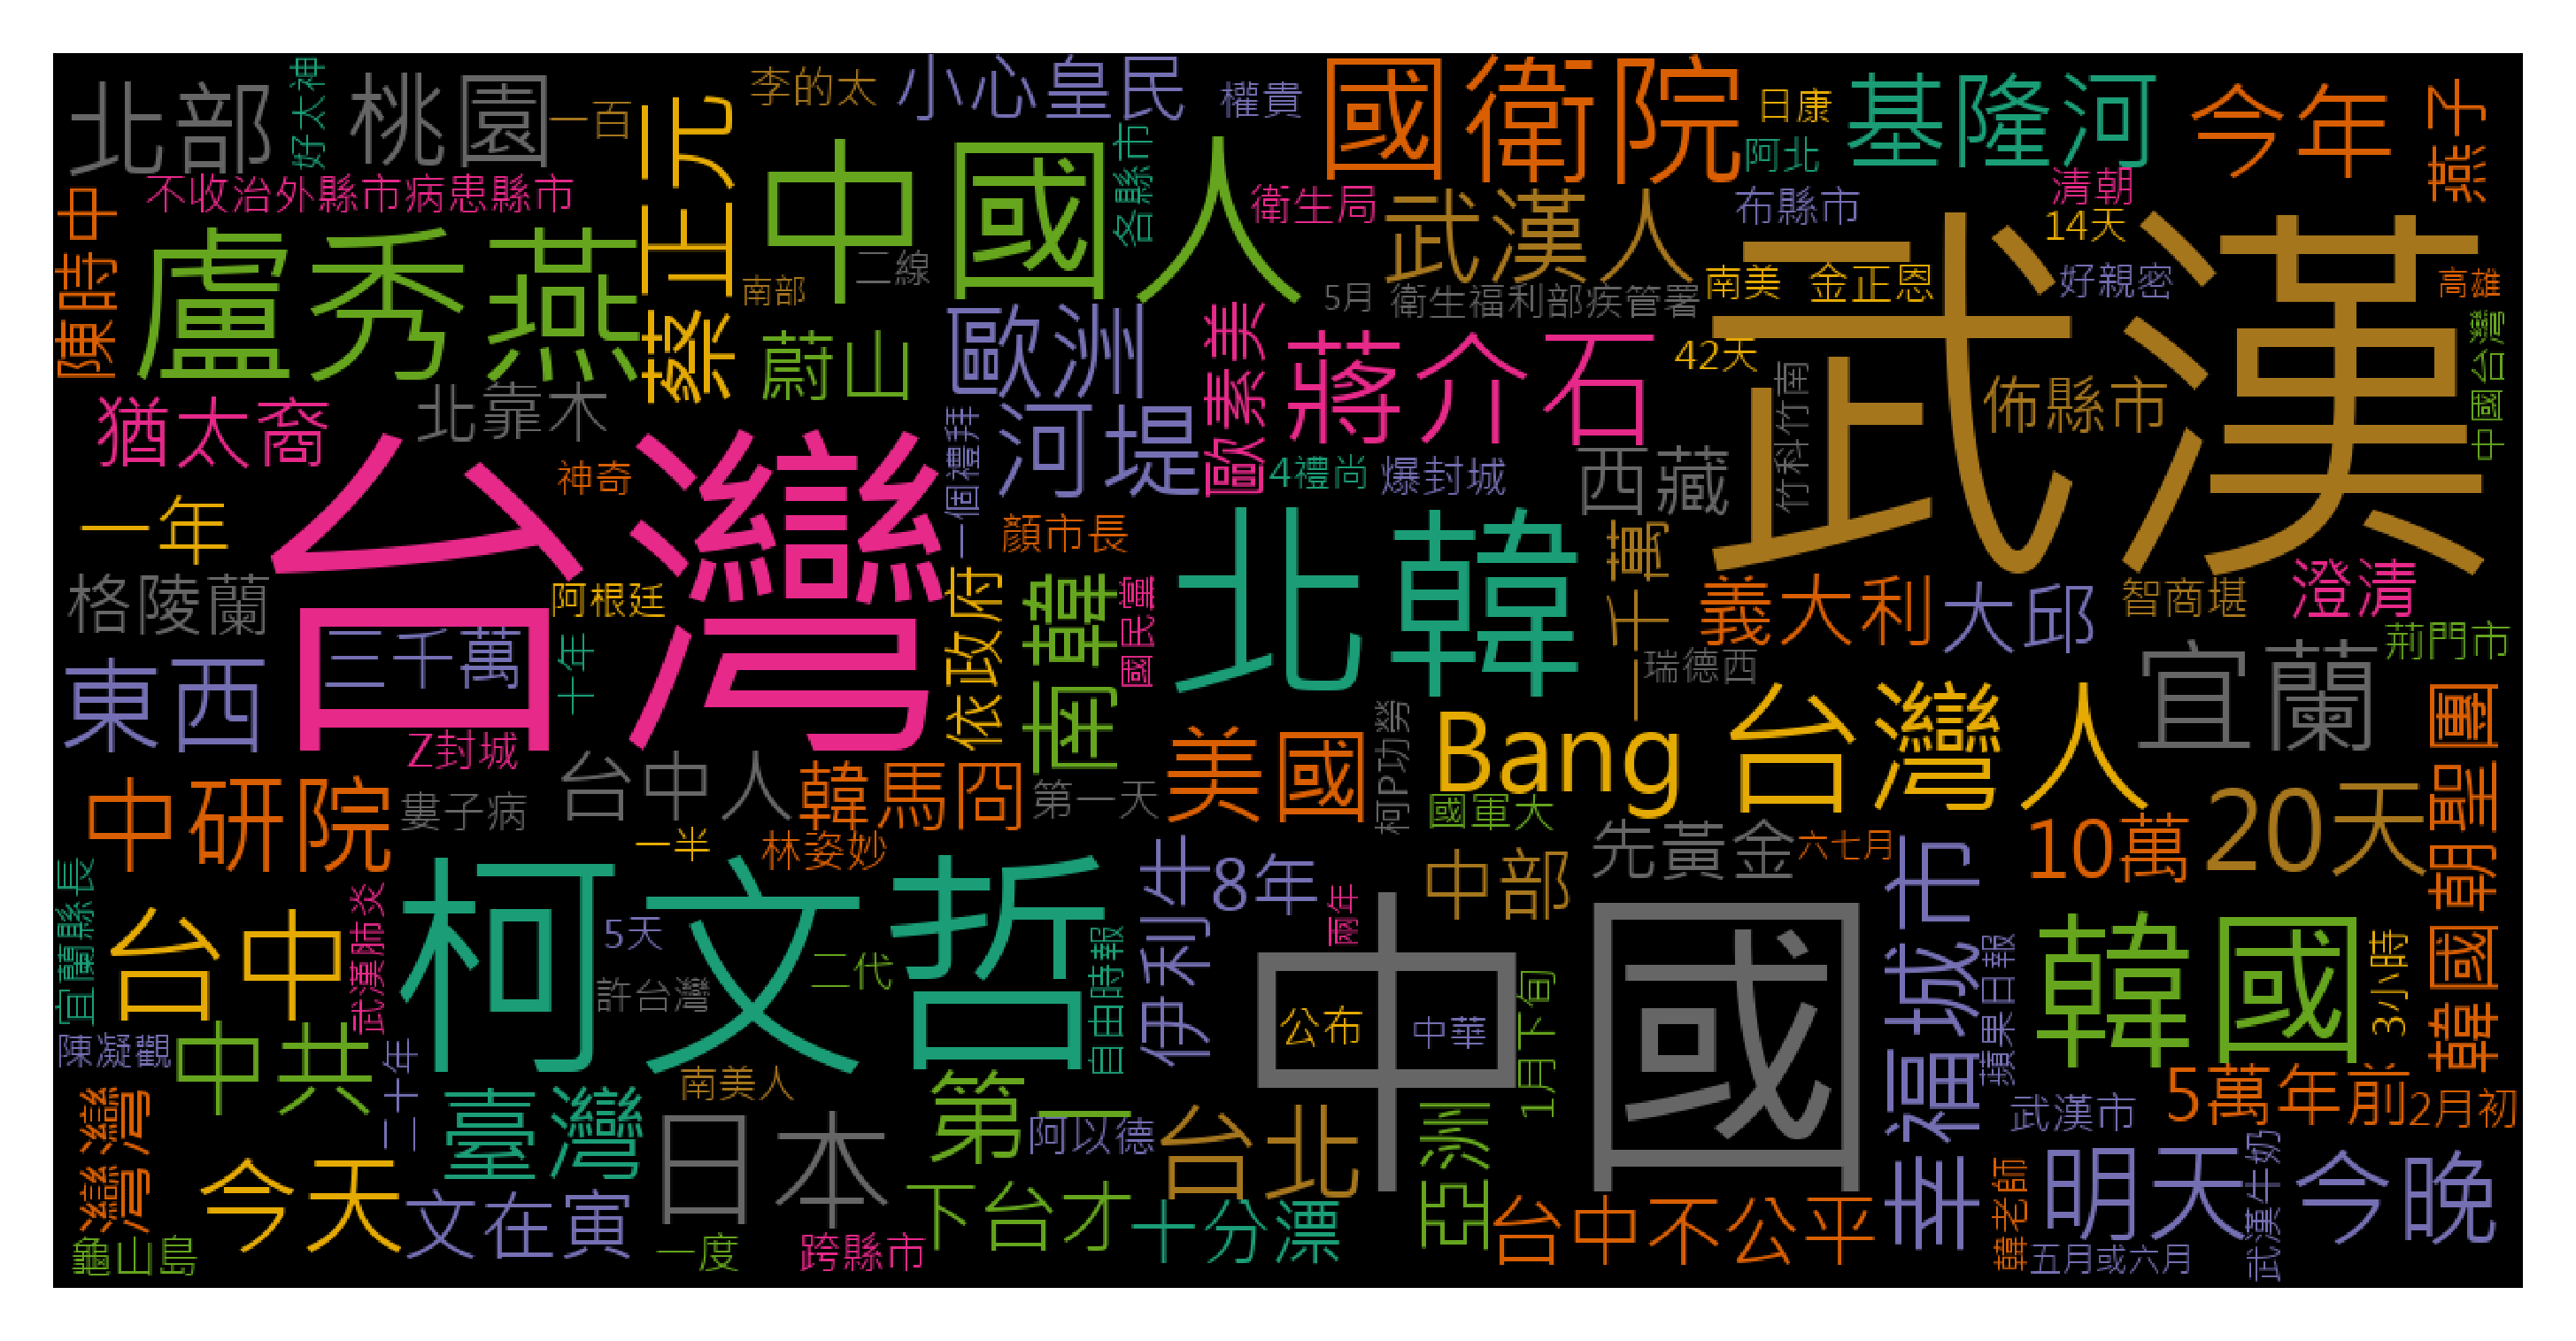

In [46]:
# 利用查詢出的結果，以文字雲方式列出各關鍵字，看出最近大家在八卦版都在聊什麼
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(r for r in count_list)
font_path = 'msjh.ttc'
wordcloud = WordCloud(width=1200, height=600, max_font_size=200, max_words=200, 
                      background_color='black', font_path=font_path, colormap='Dark2').generate(text)
plt.figure(dpi=600)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
# 哪些關鍵字會一起出現
    # 需要轉成特定格式：[[同一筆所有關鍵字], [], ...]
fq_count_lists = []
for e in entity_sentence_list:
    # 每一筆的所有實體關鍵字(同一筆表示一起出現)
    fq_count_list = []
    for i in e:
        fq_count_list.append(i[3])
    fq_count_lists.append(fq_count_list)

# 使用mlxtend分析：有多少可能性同時出現那些詞
    # 安裝：conda install -c conda-forge mlxtend
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
    # TransactionEncoder類似於獨熱編碼，每個值轉換為一個唯一的bool值
te = TransactionEncoder()
te_ary = te.fit(fq_count_lists).transform(fq_count_lists)
df = pd.DataFrame(te_ary, columns=te.columns_)
fpgrowth(df, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.482759,(武漢)
1,0.086207,(4)
2,0.086207,(盧秀燕)
3,0.034483,(第一)
4,0.034483,(美國)
5,0.241379,(中國)
6,0.103448,(中國人)
7,0.034483,(明天)
8,0.206897,(台灣)
9,0.034483,(南韓)
